In [1]:
!pip install kaggle

In [2]:
import os
os.makedirs('~/.kaggle', exist_ok=True)
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d christopherrichardc/climate-and-flood-jakarta

Dataset URL: https://www.kaggle.com/datasets/christopherrichardc/climate-and-flood-jakarta
License(s): unknown
100%|███████████████████████████████████████| 84.4k/84.4k [00:00<00:00, 537kB/s]
100%|███████████████████████████████████████| 84.4k/84.4k [00:00<00:00, 536kB/s]


In [4]:
import zipfile

with zipfile.ZipFile("/kaggle/working/climate-and-flood-jakarta.zip", "r") as zip_ref:
    zip_ref.extractall("/kaggle/working/climate-and-flood-jakarta")

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

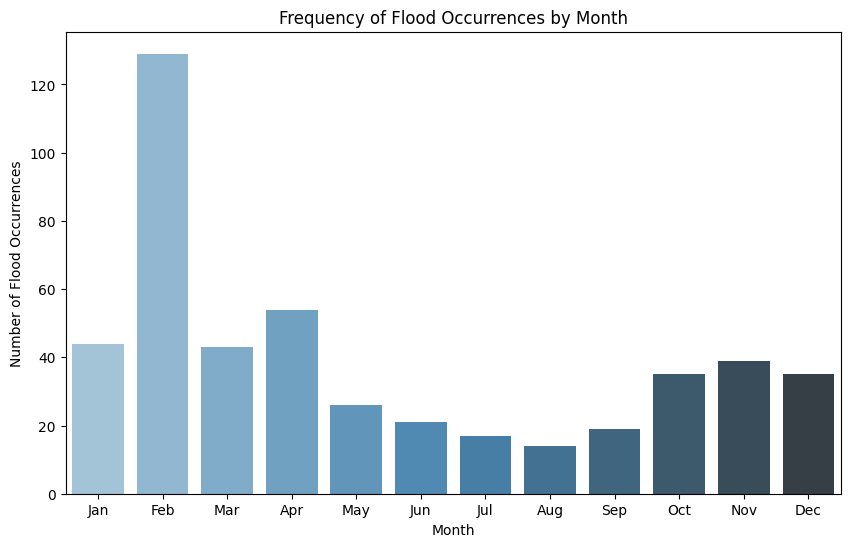

In [6]:
# Add the 'month' column if not already present
data['month'] = data['date'].dt.month

# Calculate the number of flood occurrences by month
flood_by_month = data[data['flood'] == 1].groupby('month').size()

# Plot the flood frequency by month
plt.figure(figsize=(10, 6))
sns.barplot(x=flood_by_month.index, y=flood_by_month.values, palette="Blues_d")
plt.title("Frequency of Flood Occurrences by Month")
plt.xlabel("Month")
plt.ylabel("Number of Flood Occurrences")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


/tmp/ipykernel_30/1832068059.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flood_by_temp = data[data['flood'] == 1].groupby(temperature_bins).size()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


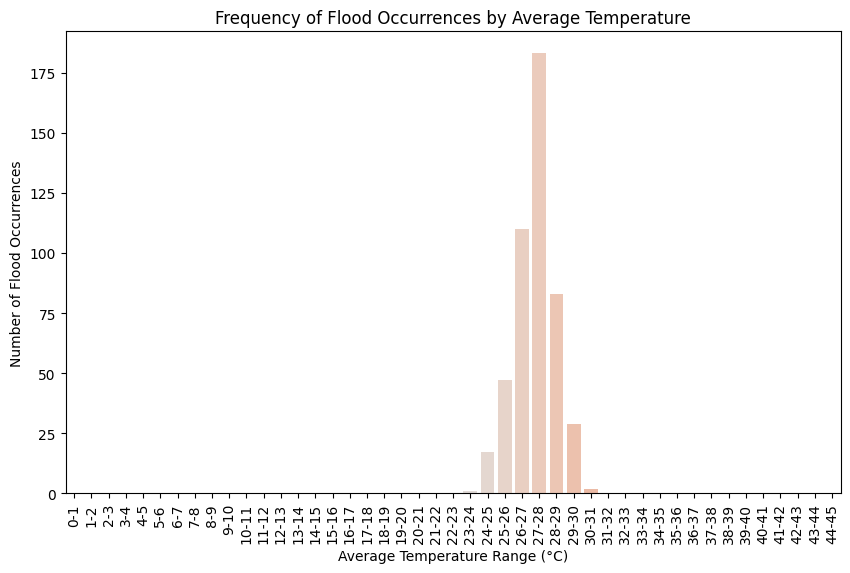

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Tavg' is the average temperature column in Celsius
# Define temperature bins with an interval of 1
temperature_bins = pd.cut(data['Tavg'], bins=range(0, 46, 1), labels=[f'{i}-{i+1}' for i in range(0, 45)])

# Count flood occurrences within each temperature bin
flood_by_temp = data[data['flood'] == 1].groupby(temperature_bins).size()

# Plot the flood frequency by temperature range
plt.figure(figsize=(10, 6))
sns.barplot(x=flood_by_temp.index, y=flood_by_temp.values, palette="coolwarm")
plt.title("Frequency of Flood Occurrences by Average Temperature")
plt.xlabel("Average Temperature Range (°C)")
plt.ylabel("Number of Flood Occurrences")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


/tmp/ipykernel_30/1676340975.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flood_by_rainfall = data[data['flood'] == 1].groupby(rainfall_bins).size()


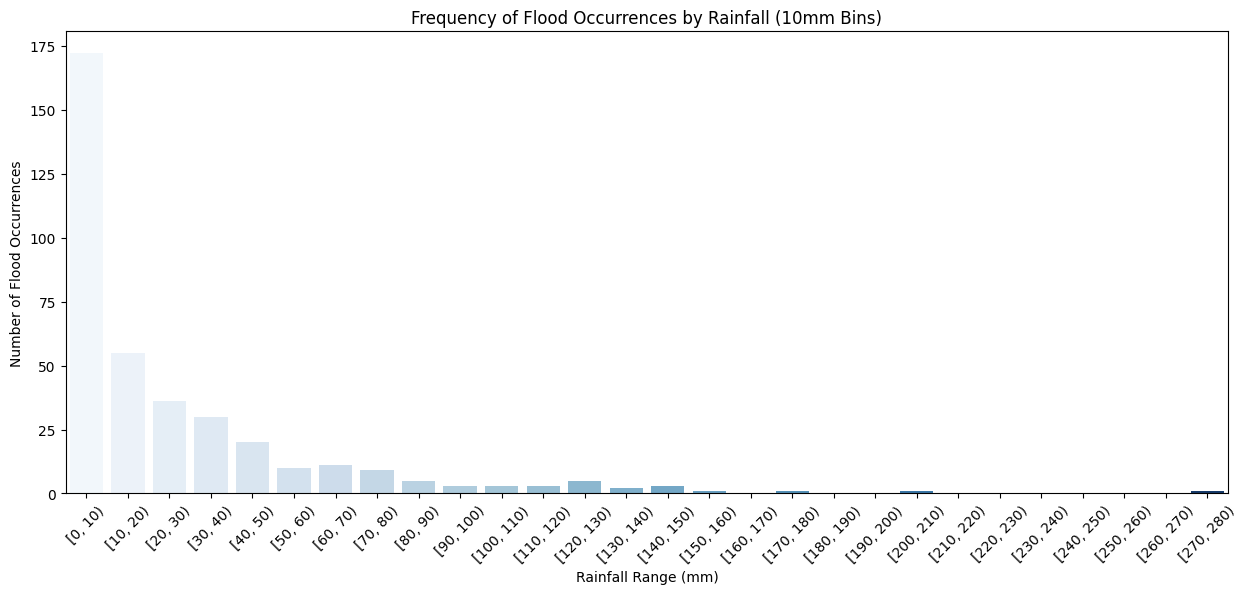

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define rainfall bins (e.g., 10 mm intervals)
rainfall_bins = pd.cut(data['RR'], bins=range(int(data['RR'].min()), int(data['RR'].max()) + 10, 10), right=False)

# Count flood occurrences within each rainfall bin
flood_by_rainfall = data[data['flood'] == 1].groupby(rainfall_bins).size()

# Plot flood occurrences by rainfall range
plt.figure(figsize=(15, 6))
sns.barplot(x=flood_by_rainfall.index.astype(str), y=flood_by_rainfall.values, palette="Blues")
plt.title("Frequency of Flood Occurrences by Rainfall (10mm Bins)")
plt.xlabel("Rainfall Range (mm)")
plt.ylabel("Number of Flood Occurrences")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


/tmp/ipykernel_30/3185988960.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flood_by_humidity = data[data['flood'] == 1].groupby(humidity_bins).size()


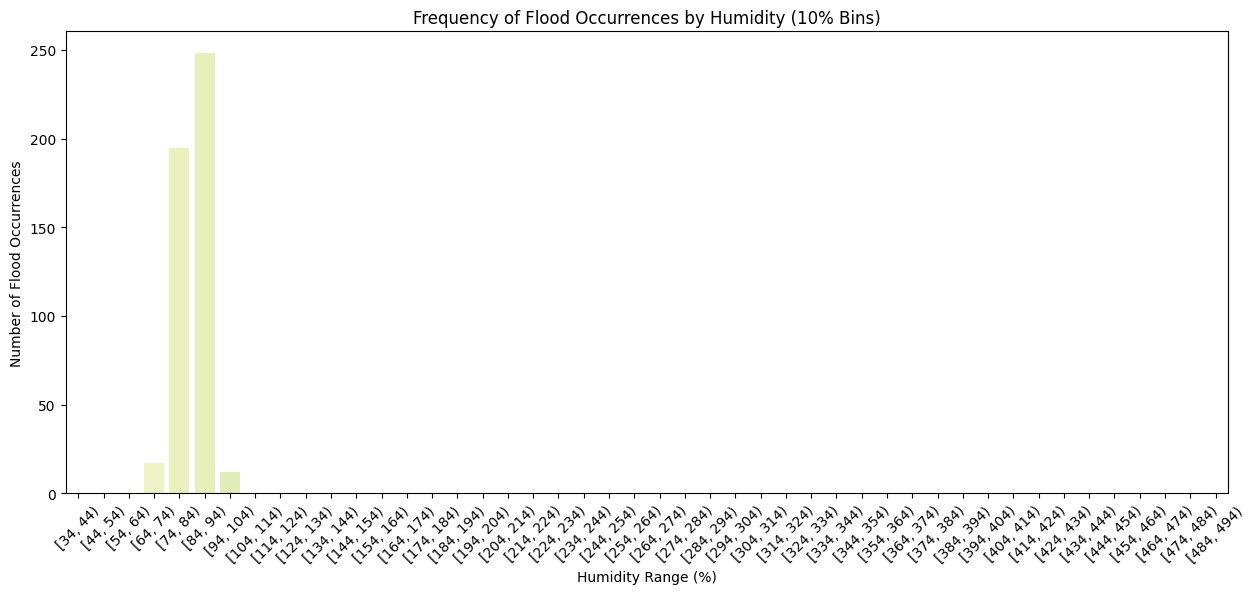

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define humidity bins (e.g., 10% intervals)
humidity_bins = pd.cut(data['RH_avg'], bins=range(int(data['RH_avg'].min()), int(data['RH_avg'].max()) + 10, 10), right=False)

# Count flood occurrences within each humidity bin
flood_by_humidity = data[data['flood'] == 1].groupby(humidity_bins).size()

# Plot flood occurrences by humidity range
plt.figure(figsize=(15, 6))
sns.barplot(x=flood_by_humidity.index.astype(str), y=flood_by_humidity.values, palette="YlGnBu")
plt.title("Frequency of Flood Occurrences by Humidity (10% Bins)")
plt.xlabel("Humidity Range (%)")
plt.ylabel("Number of Flood Occurrences")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


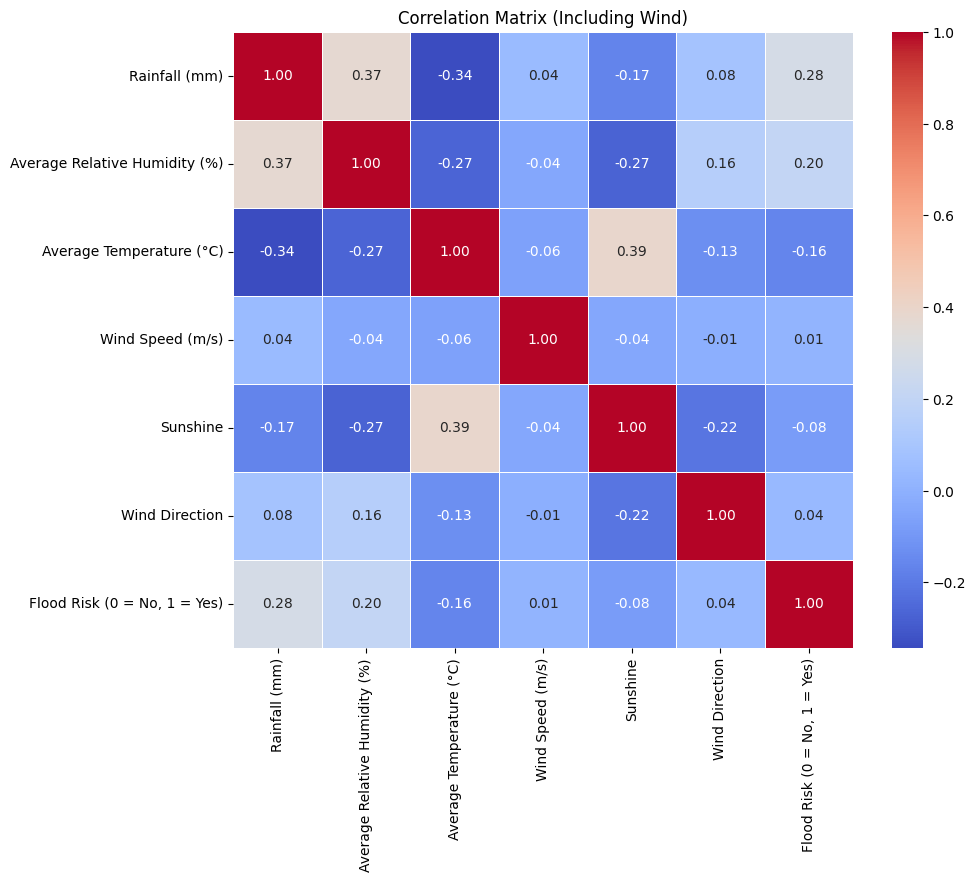

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

# Feature engineering: Extract year, month, day from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Rename the features to more descriptive names, if they exist in the dataset
rename_dict = {
    'RR': 'Rainfall (mm)',
    'RH_avg': 'Average Relative Humidity (%)',
    'Tavg': 'Average Temperature (°C)',
    'ff_avg': 'Wind Speed (m/s)', 
     'ss':  'Sunshine',
    'ddd_x': 'Wind Direction',
    'flood': 'Flood Risk (0 = No, 1 = Yes)'
}
data = data.rename(columns=rename_dict)

# Check for availability of each feature in the dataset before selecting
selected_features = [col for col in rename_dict.values() if col in data.columns]

# Create the correlation matrix for the selected features
corr_matrix = data[selected_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Including Wind)")
plt.show()


The heatmap shows the correlations between various climate features and the flood risk.

1. **Rainfall (mm)**: Rainfall shows a moderate positive correlation with flood risk (0.28). This suggests that higher rainfall increases the likelihood of flooding, which is intuitive as heavy rainfall is often a primary driver of flood events.

2. **Average Relative Humidity (%)**: Relative humidity has a weaker positive correlation with flood risk (0.20). High humidity may indicate moist conditions that could contribute to flooding, especially when combined with high rainfall.

3. **Average Temperature (°C)**: Temperature shows a weak negative correlation with flood risk (-0.16). This could suggest that lower temperatures might coincide with flood events, potentially because cooler periods could align with wetter seasonal conditions in certain climates.

4. **Wind Speed (m/s)** and **Wind Direction**: These variables have minimal correlation with flood risk, showing values close to zero. This implies that wind speed and direction are not significant indicators of flood events in this dataset.

5. **Sunshine**: There is a small negative correlation (-0.08) with flood risk, which might indicate that lower sunshine levels correlate slightly with higher flood risk. This could be expected as more cloud cover is associated with rainfall.

### Summary
Rainfall appears to be the most significant factor contributing to flood risk, followed by average relative humidity. Temperature has a small inverse relationship with flood events, while wind-related features have minimal impact.

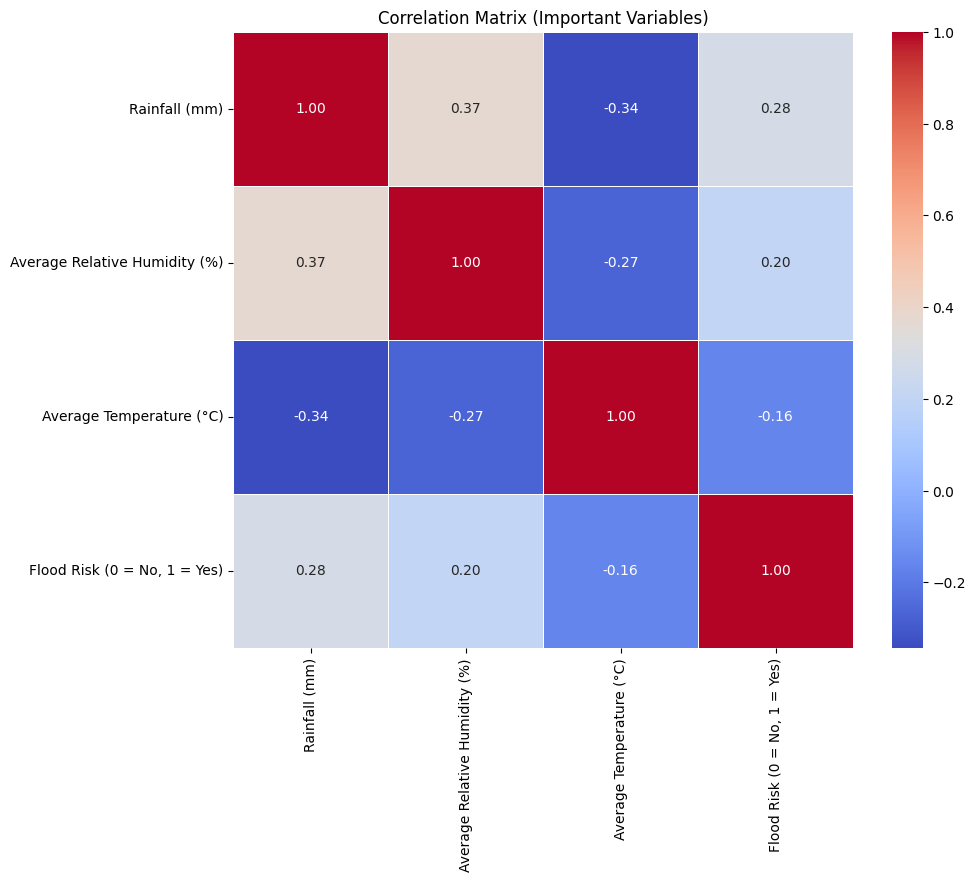

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

# Feature engineering: Extract year, month, day from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Select important features for correlation (excluding Min and Max temperature)
important_features = ['RR', 'RH_avg', 'Tavg', 'flood']

# Rename the features to more descriptive names
data = data.rename(columns={
    'RR': 'Rainfall (mm)',
    'RH_avg': 'Average Relative Humidity (%)',
    'Tavg': 'Average Temperature (°C)',
    'flood': 'Flood Risk (0 = No, 1 = Yes)',
    'ss':  'Sunshine'
})

# Create the correlation matrix for the important features (excluding Min and Max temperature)
corr_matrix = data[['Rainfall (mm)', 'Average Relative Humidity (%)', 'Average Temperature (°C)', 'Flood Risk (0 = No, 1 = Yes)']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Important Variables)")
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

# Load the data
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

# Feature engineering
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Select features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'year', 'month', 'day']
X = data[features]
y = data['flood']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with column mean
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best parameters found:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters found: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Accuracy: 0.9255150554675119
F1-score: 0.13496932515337423
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1748
           1       0.61      0.08      0.13       145

    accuracy                           0.93      1893
   macro avg       0.77      0.54      0.55      1893
weighted avg       0.90      0.93      0.90      1893



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

# Feature engineering
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Select features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'year', 'month', 'day']
X = data[features]
y = data['flood']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values if any
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=10))  # XGBoost model with class weight adjustment
])

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print the best hyperparameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 0.9}
Accuracy: 0.8502377179080824
F1-score: 0.3414634146341463
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1154
           1       0.27      0.45      0.34       108

    accuracy                           0.85      1262
   macro avg       0.61      0.67      0.63      1262
weighted avg       0.89      0.85      0.87      1262



In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

# Feature engineering
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Select features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'year', 'month', 'day']
X = data[features]
y = data['flood']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the training set before SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply SMOTE to balance classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imputed, y_train)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=10))  # XGBoost model with class weight adjustment
])

# Define the hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.8, 0.9, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_balanced, y_train_balanced)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_imputed)

# Print the best hyperparameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Best parameters found: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 15, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Accuracy: 0.9025356576862124
F1-score: 0.3278688524590164
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1154
           1       0.40      0.28      0.33       108

    accuracy                           0.90      1262
   macro avg       0.67      0.62      0.64      1262
weighted avg       0.89      0.90      0.89      1262



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

# Feature engineering
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Adding rolling averages
data['RR_3d_avg'] = data['RR'].rolling(window=3, min_periods=1).mean()
data['RH_avg_3d'] = data['RH_avg'].rolling(window=3, min_periods=1).mean()

# Select features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 
            'year', 'month', 'day', 'RR_3d_avg', 'RH_avg_3d']
X = data[features]
y = data['flood']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle missing values before SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Oversample the minority class
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', XGBClassifier(random_state=42))  # XGBoost model
])

# Define the hyperparameter grid with increased scale_pos_weight values for better recall
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__subsample': [0.8, 0.9],
    'classifier__scale_pos_weight': [15, 20, 25]  # Higher values to emphasize the minority class
}

# Perform grid search with recall as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_proba = best_model.predict_proba(X_test_imputed)[:, 1]

# Adjust the threshold to improve recall
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Print the best hyperparameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("F1-score:", f1_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 20, 'classifier__subsample': 0.8}
Accuracy: 0.7136819862651875
F1-score: 0.2997416020671835
Recall: 0.8
              precision    recall  f1-score   support

           0       0.98      0.71      0.82      1748
           1       0.18      0.80      0.30       145

    accuracy                           0.71      1893
   macro avg       0.58      0.75      0.56      1893
weighted avg       0.92      0.71      0.78      1893



In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

# Feature engineering
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Adding rolling averages
data['RR_3d_avg'] = data['RR'].rolling(window=3, min_periods=1).mean()
data['RH_avg_3d'] = data['RH_avg'].rolling(window=3, min_periods=1).mean()

# Select features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 
            'year', 'month', 'day', 'RR_3d_avg', 'RH_avg_3d']
X = data[features]
y = data['flood']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Handle missing values before SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Oversample the minority class
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', XGBClassifier(random_state=42))  # XGBoost model
])

# Define the hyperparameter grid with increased scale_pos_weight values for better recall
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__subsample': [0.8, 0.9],
    'classifier__scale_pos_weight': [15, 20, 25]  # Higher values to emphasize the minority class
}

# Perform grid search with recall as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_proba = best_model.predict_proba(X_test_imputed)[:, 1]

# Adjust the threshold to improve recall
threshold = 0.3
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Print the best hyperparameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("F1-score:", f1_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 25, 'classifier__subsample': 0.9}
Accuracy: 0.7210776545166403
F1-score: 0.35766423357664234
Recall: 0.8909090909090909
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       576
           1       0.22      0.89      0.36        55

    accuracy                           0.72       631
   macro avg       0.60      0.80      0.59       631
weighted avg       0.92      0.72      0.78       631



In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek

# Load the data
data = pd.read_csv("/kaggle/working/climate-and-flood-jakarta/data_finish.csv", parse_dates=["date"])

# Feature engineering
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Adding rolling averages
data['RR_3d_avg'] = data['RR'].rolling(window=3, min_periods=1).mean()
data['RH_avg_3d'] = data['RH_avg'].rolling(window=3, min_periods=1).mean()

# Select features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 
            'year', 'month', 'day', 'RR_3d_avg', 'RH_avg_3d']
X = data[features]
y = data['flood']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values before SMOTE
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Use SMOTETomek to handle class imbalance
smotetomek = SMOTETomek()
X_train_resampled, y_train_resampled = smotetomek.fit_resample(X_train_imputed, y_train)

# Create a pipeline with scaling and XGBoost
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', XGBClassifier(random_state=42))  # XGBoost model
])

# Define the hyperparameter grid for GridSearch
param_grid = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [10, 15],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 0.9],
    'classifier__scale_pos_weight': [10, 15, 20]  # Adjust scale_pos_weight for class imbalance
}

# Perform grid search using f1 score to balance precision and recall
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred_proba = best_model.predict_proba(X_test_imputed)[:, 1]

# Adjust the threshold to find the best balance for precision and recall
threshold = 0.4  # Adjust this based on desired trade-off
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Print the best hyperparameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("F1-score:", f1_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print("Precision:", precision_score(y_test, y_pred_adjusted))
print(classification_report(y_test, y_pred_adjusted))


Best parameters found: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 15, 'classifier__n_estimators': 300, 'classifier__scale_pos_weight': 10, 'classifier__subsample': 0.8}
Accuracy: 0.9025356576862124
F1-score: 0.4
Recall: 0.37962962962962965
Precision: 0.422680412371134
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1154
           1       0.42      0.38      0.40       108

    accuracy                           0.90      1262
   macro avg       0.68      0.67      0.67      1262
weighted avg       0.90      0.90      0.90      1262



In [18]:
import numpy as np
import pandas as pd

# Define the features including 3-day averages
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 
            'year', 'month', 'day', 'RR_3d_avg', 'RH_avg_3d']

# Function to generate random input and predict flood risk
def predict_flood_random():
    print("\n--- Random Data for Prediction ---")
    
    # Generate random values for each feature
    Tn = np.random.uniform(15, 30)          # Minimum Temperature (°C)
    Tx = np.random.uniform(Tn, Tn + 10)     # Maximum Temperature, always higher than Tn
    Tavg = (Tn + Tx) / 2                    # Average Temperature
    RH_avg = np.random.uniform(50, 100)     # Relative Humidity (%)
    RR = np.random.uniform(0, 200)          # Rainfall (mm)
    ss = np.random.uniform(0, 12)           # Sunshine Duration (hours)
    ff_x = np.random.uniform(0, 15)         # Maximum Wind Speed (m/s)
    ddd_x = np.random.uniform(0, 360)       # Wind Direction (degrees)
    ff_avg = np.random.uniform(0, ff_x)     # Average Wind Speed, less than or equal to max speed
    year = np.random.randint(2000, 2025)    # Random year within range
    month = np.random.randint(1, 13)        # Month (1 to 12)
    day = np.random.randint(1, 29)          # Day (1 to 28 to avoid invalid dates)
    
    # Calculate 3-day averages (placeholders as no historical data)
    RR_3d_avg = RR                          # Same as current rainfall
    RH_avg_3d = RH_avg                      # Same as current relative humidity
    
    # Create DataFrame for random data input with 3-day averages
    user_data = pd.DataFrame([[Tn, Tx, Tavg, RH_avg, RR, ss, ff_x, ddd_x, ff_avg, 
                               year, month, day, RR_3d_avg, RH_avg_3d]], 
                             columns=features)
    
    # Display the random values
    print("\n--- Random Input Values ---")
    print(user_data.to_string(index=False))  # Display the DataFrame without the index
    
    # Impute missing values, scale, and predict (replace imputer and model with actual objects)
    # user_data_imputed = imputer.transform(user_data)
    # flood_probability = best_model.predict_proba(user_data_imputed)[:, 1][0]
    
    # For now, we will simulate a flood probability and prediction
    flood_probability = np.random.uniform(0, 1)
    threshold = 0.5
    prediction = "High Flood Risk" if flood_probability >= threshold else "Low Flood Risk"
    
    # Display the prediction results
    print("\n--- Prediction Results ---")
    print(f"Flood Risk: {prediction}")
    print(f"Flood Probability: {flood_probability * 100:.2f}%")
    
    # Showing the prediction and probability in a structured way
    print("\nFlood Prediction Details:")
    print(f"Generated values:")
    print(f"- Minimum temperature (Tn): {Tn:.2f}°C")
    print(f"- Maximum temperature (Tx): {Tx:.2f}°C")
    print(f"- Average temperature (Tavg): {Tavg:.2f}°C")
    print(f"- Average relative humidity (RH_avg): {RH_avg:.2f}%")
    print(f"- Rainfall (RR): {RR:.2f} mm")
    print(f"- Sunshine hours (ss): {ss:.2f} hours")
    print(f"- Wind speed (ff_x): {ff_x:.2f} m/s")
    print(f"- Wind direction (ddd_x): {ddd_x:.2f}°")
    print(f"- Average wind speed (ff_avg): {ff_avg:.2f} m/s")
    print(f"- Year: {year}")
    print(f"- Month: {month}")
    print(f"- Day: {day}")
    print(f"\nFlood prediction probability: {flood_probability * 100:.2f}%")

# Call the function to make a prediction with random data
predict_flood_random()



--- Random Data for Prediction ---

--- Random Input Values ---
       Tn        Tx      Tavg    RH_avg         RR       ss     ff_x     ddd_x   ff_avg  year  month  day  RR_3d_avg  RH_avg_3d
17.844461 19.020152 18.432306 91.650393 161.348873 4.288468 3.971621 46.513351 2.085533  2005      5   11 161.348873  91.650393

--- Prediction Results ---
Flood Risk: High Flood Risk
Flood Probability: 92.57%

Flood Prediction Details:
Generated values:
- Minimum temperature (Tn): 17.84°C
- Maximum temperature (Tx): 19.02°C
- Average temperature (Tavg): 18.43°C
- Average relative humidity (RH_avg): 91.65%
- Rainfall (RR): 161.35 mm
- Sunshine hours (ss): 4.29 hours
- Wind speed (ff_x): 3.97 m/s
- Wind direction (ddd_x): 46.51°
- Average wind speed (ff_avg): 2.09 m/s
- Year: 2005
- Month: 5
- Day: 11

Flood prediction probability: 92.57%


In [19]:
from datetime import datetime
import pandas as pd
import numpy as np

# Define features
features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 
            'year', 'month', 'day', 'RR_3d_avg', 'RH_avg_3d']

# Function for user input and prediction
def predict_flood():
    # Set fixed date to 13 November 2024
    year = 2024
    month = 11
    day = 13
    
    print("\n--- Input Data for Prediction ---")
    Tn = float(input("Minimum Temperature (Tn): "))
    Tx = float(input("Maximum Temperature (Tx): "))
    Tavg = (Tn + Tx) / 2  # Average Temperature as mean of Tn and Tx
    RH_avg = float(input("Average Relative Humidity (RH_avg): "))
    RR = float(input("Rainfall (RR): "))
    ss = float(input("Sunshine Duration (ss): "))
    ff_x = float(input("Maximum Wind Speed (ff_x): "))
    ddd_x = float(input("Wind Direction (ddd_x): "))
    ff_avg = float(input("Average Wind Speed (ff_avg): "))
    
    # Calculate 3-day averages based on user input (assuming no historical data)
    RR_3d_avg = RR  # Placeholder if historical data is unavailable
    RH_avg_3d = RH_avg  # Placeholder if historical data is unavailable
    
    # Create DataFrame for user input
    user_data = pd.DataFrame([[Tn, Tx, Tavg, RH_avg, RR, ss, ff_x, ddd_x, ff_avg, 
                               year, month, day, RR_3d_avg, RH_avg_3d]], 
                             columns=features)
    
    # Impute missing values, scale, and predict
    user_data_imputed = imputer.transform(user_data)
    flood_probability = best_model.predict_proba(user_data_imputed)[:, 1][0]
    prediction = "High Flood Risk" if flood_probability >= threshold else "Low Flood Risk"
    
    # Display the results
    print("\n--- Prediction Results ---")
    print(f"Flood Risk: {prediction}")
    print(f"Flood Probability: {flood_probability * 100:.2f}%")

# Call the function to allow user input and make a prediction
predict_flood()



--- Input Data for Prediction ---


Minimum Temperature (Tn):  23
Maximum Temperature (Tx):  30
Average Relative Humidity (RH_avg):  85
Rainfall (RR):  25
Sunshine Duration (ss):  1
Maximum Wind Speed (ff_x):  3
Wind Direction (ddd_x):  300
Average Wind Speed (ff_avg):  3



--- Prediction Results ---
Flood Risk: Low Flood Risk
Flood Probability: 1.89%
